<a href="https://colab.research.google.com/github/SHRISHTIARYA01/MINIPROJECT/blob/main/MiniProject_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.5101 - loss: 0.7427 - val_accuracy: 0.6484 - val_loss: 0.6365
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6856 - loss: 0.6080 - val_accuracy: 0.7253 - val_loss: 0.5351
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7998 - loss: 0.5084 - val_accuracy: 0.7912 - val_loss: 0.4586
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8390 - loss: 0.4530 - val_accuracy: 0.8352 - val_loss: 0.4024
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8891 - loss: 0.3887 - val_accuracy: 0.8571 - val_loss: 0.3575
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9120 - loss: 0.3280 - val_accuracy: 0.8791 - val_loss: 0.3202
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9039 - loss: 0.3255 - val_accuracy: 0.8901 - val_loss: 0.2916
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9455 - loss: 0.2546 - val_accuracy: 0.9121 - v

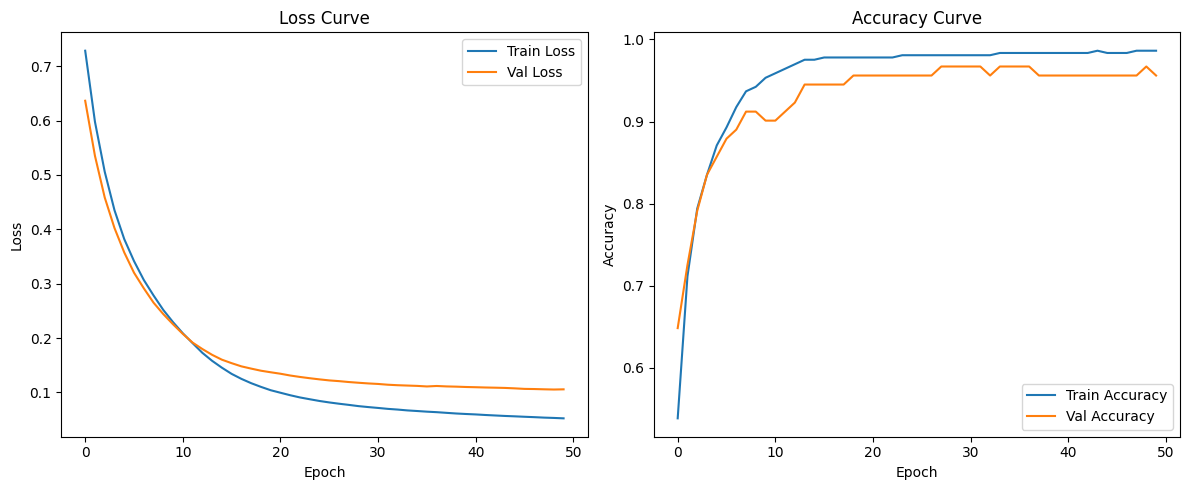

In [1]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 3. Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Build the Feedforward Neural Network model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# 6. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Define EarlyStopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 8. Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

# 9. Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# 10. Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred_classes)
prec = precision_score(y_test, y_pred_classes)
rec = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

# 11. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 12. Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()